In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
salary_data = pd.read_csv("data/data science salary.csv")

# Salary Trends over Time

In [4]:
# Group the data by work_year and calculate the average salary for each year
average_salary_by_year = salary_data.groupby('work_year')['salary_in_usd'].mean()
average_salary_by_year

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

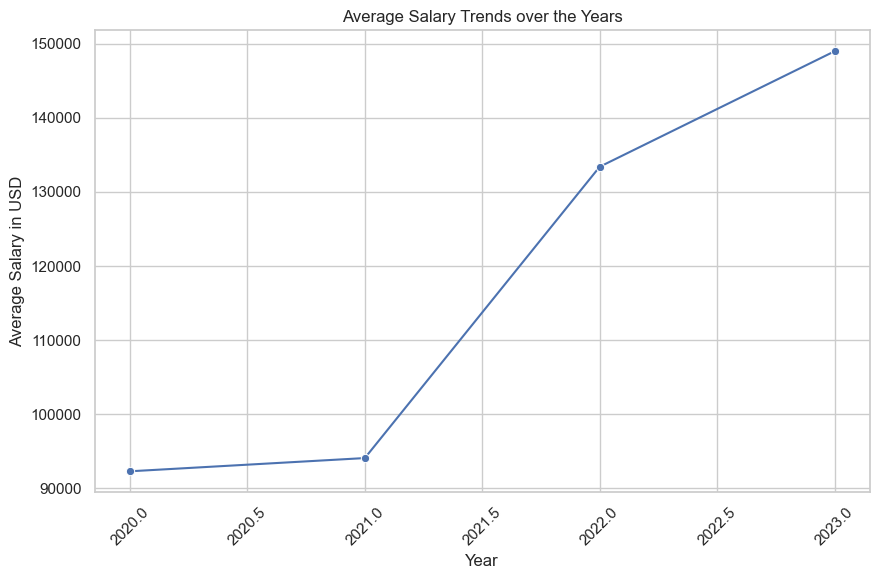

In [5]:
# Set style for Seaborn
sns.set(style="whitegrid")

# Group the data by work_year and calculate the average salary for each year
average_salary_by_year = salary_data.groupby('work_year')['salary_in_usd'].mean()

# Create a line plot to visualize salary trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_salary_by_year, marker='o')
plt.title('Average Salary Trends over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()

# Optimal Hiring Decisions

##### Analyze the relationship between Experience_level, Employment_type, and Salary_in_usd

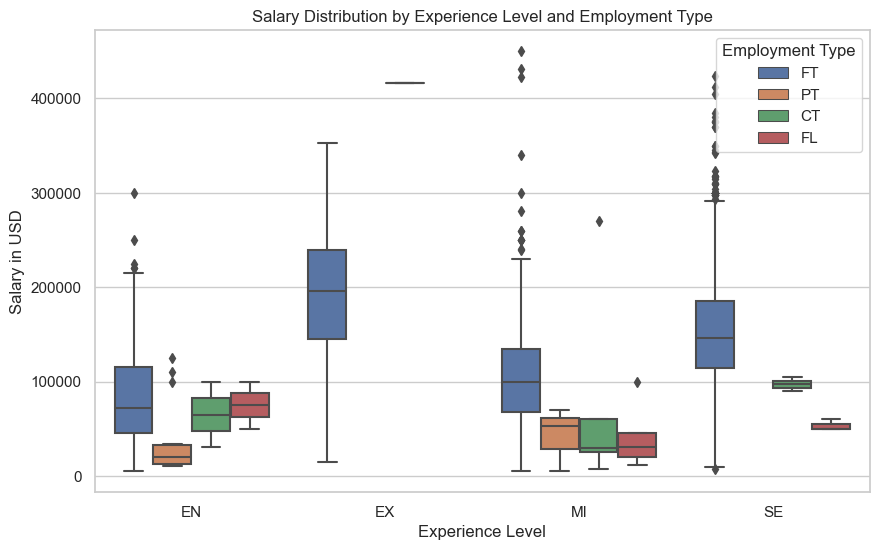

In [6]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_data, x='experience_level', y='salary_in_usd', hue='employment_type')
plt.title('Salary Distribution by Experience Level and Employment Type')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend(title='Employment Type')
plt.show()

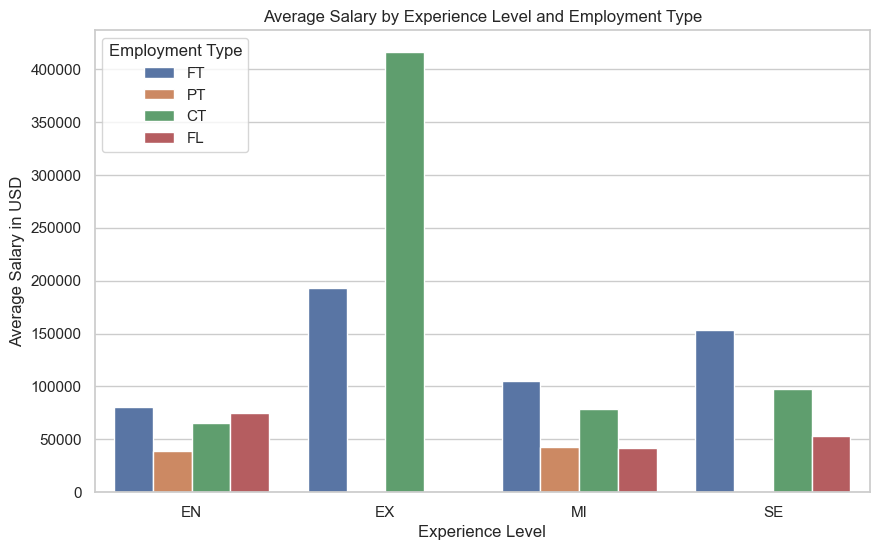

In [10]:
# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_data, x='experience_level', y='salary_in_usd', hue='employment_type', errorbar=None)
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.legend(title='Employment Type')
plt.show()

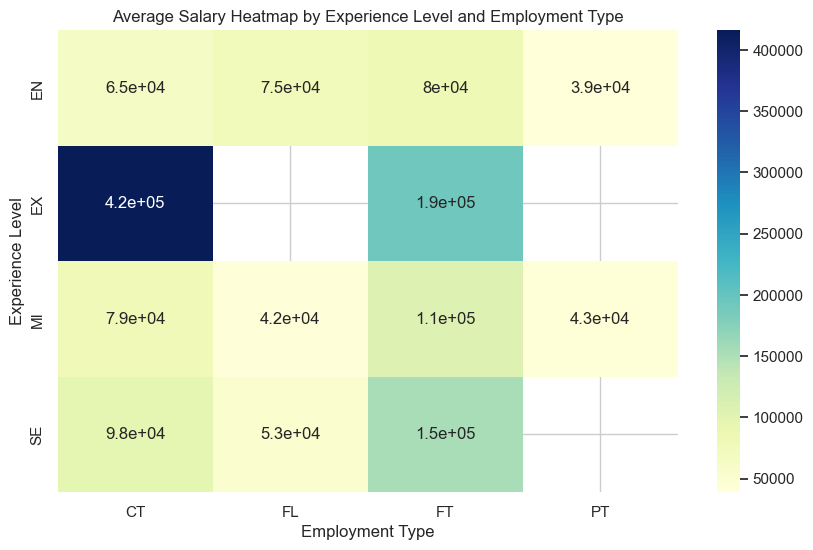

In [11]:
# heatmap
pivot_table = salary_data.pivot_table(index='experience_level', columns='employment_type', values='salary_in_usd', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Average Salary Heatmap by Experience Level and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Experience Level')
plt.show()

##### Calculate average salaries for different combinations of experience levels and employment types.

In [13]:
# Create a list of unique experience levels and employment types
experience_levels = salary_data['experience_level'].unique()
employment_types = salary_data['employment_type'].unique()

# Create a 2D array to store average salaries
average_salaries = np.zeros((len(experience_levels), len(employment_types)))

# Loop through each combination of experience levels and employment types
for i, exp_level in enumerate(experience_levels):
    for j, emp_type in enumerate(employment_types):
        # Filter the dataset for the current combination
        filtered_data = salary_data[(salary_data['experience_level'] == exp_level) & (salary_data['employment_type'] == emp_type)]

        # Calculate the average salary for the current combination
        average_salary = np.mean(filtered_data['salary_in_usd'])

        # Store the average salary in the array
        average_salaries[i, j] = average_salary

# Create a new DataFrame to display the results
average_salary_df = pd.DataFrame(average_salaries, index=experience_levels, columns=employment_types)

print(average_salary_df)

               FT       PT        CT            FL
EN   80496.529801  38885.0   65234.5  75000.000000
EX  192974.566372      NaN  416000.0           NaN
MI  105336.726131  42561.0   78600.0  41615.600000
SE  153225.744528      NaN   97500.0  53333.333333


# Job Title Recommendation

In [16]:
# Group the data by Experience_level, Salary_in_usd, and Job_title
grouped_data = salary_data.groupby(['experience_level', 'salary_in_usd', 'job_title']).size().reset_index(name='Count')
grouped_data

,experience_level,salary_in_usd,job_title,Count
0,EN,5409,Power BI Developer,1
1,EN,5707,Data Science Consultant,1
2,EN,5882,Big Data Engineer,1
3,EN,6072,Data Analyst,1
4,EN,6270,BI Data Analyst,1
...,...,...,...,...
2056,SE,380000,Applied Data Scientist,1
2057,SE,385000,Data Analyst,1
2058,SE,405000,Data Analytics Lead,1
2059,SE,412000,Data Scientist,1


In [17]:
# Group the data by 'Job_title' and 'Experience_level', then calculate the average salary for each group
average_salaries = salary_data.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
average_salaries

,job_title,experience_level,salary_in_usd
0,3D Computer Vision Researcher,EN,35000.000000
1,3D Computer Vision Researcher,MI,5409.000000
2,3D Computer Vision Researcher,SE,10000.000000
3,AI Developer,EN,130884.500000
4,AI Developer,MI,137510.000000
...,...,...,...
187,Research Scientist,SE,179892.979592
188,Software Data Engineer,MI,75020.000000
189,Software Data Engineer,SE,50000.000000
190,Staff Data Analyst,EX,15000.000000


In [19]:
# Define the desired salary range
desired_salary_min = 90000
desired_salary_max = 120000

# Filter the dataset to find job titles within the desired salary range
suitable_job_titles = salary_data[(salary_data['salary_in_usd'] >= desired_salary_min) & (salary_data['salary_in_usd'] <= desired_salary_max)]['job_title'].unique()

# Print the recommended job titles
print("Recommended Job Titles:")
for title in suitable_job_titles:
    print(title)

Recommended Job Titles:
Data Quality Analyst
Applied Scientist
Data Engineer
Research Engineer
Data Scientist
Data Analyst
Research Scientist
BI Developer
AI Developer
Deep Learning Engineer
Machine Learning Engineer
Business Data Analyst
Data Manager
Data Architect
MLOps Engineer
Data Science Manager
Data Science Consultant
Data Modeler
Data Strategist
Analytics Engineer
Data Analytics Manager
Applied Machine Learning Scientist
ML Engineer
Data Analytics Specialist
Machine Learning Software Engineer
Machine Learning Infrastructure Engineer
Azure Data Engineer
BI Analyst
Data Science Engineer
Cloud Database Engineer
Product Data Analyst
Data Specialist
Financial Data Analyst
Lead Data Engineer
Machine Learning Researcher
BI Data Analyst
Data Operations Engineer
Data Analytics Consultant
AI Scientist
Machine Learning Scientist
Data Operations Analyst
Lead Machine Learning Engineer
Applied Data Scientist
Machine Learning Developer
Data Analytics Engineer
Computer Vision Software Engineer

In [20]:
# Group the data by Experience_level, Job_title, and calculate the average salary
average_salaries_by_experience_and_title = salary_data.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean()

# Convert the grouped data into a pivot table for better visualization
pivot_table = average_salaries_by_experience_and_title.unstack()

# Display the pivot table
print(pivot_table)

job_title         3D Computer Vision Researcher   AI Developer  AI Programmer  \
experience_level                                                                
EN                                      35000.0  130884.500000        55000.0   
EX                                          NaN            NaN            NaN   
MI                                       5409.0  137510.000000            NaN   
SE                                      10000.0  147666.666667            NaN   

job_title          AI Scientist  Analytics Engineer  Applied Data Scientist  \
experience_level                                                              
EN                 52781.285714       130000.000000            66679.000000   
EX                200000.000000       175125.000000                     NaN   
MI                117726.200000       102480.230769            77977.000000   
SE                201278.000000       158404.024691           208439.333333   

job_title         Applied Machine Lear

In [25]:
# Define the candidate's desired salary range and experience level
desired_salary_range = (90000, 120000)  # Example salary range in USD
desired_experience_level = 'MI'  # Example experience level

# Filter the dataset based on desired salary range and experience level
filtered_df = salary_data[(salary_data['salary_in_usd'] >= desired_salary_range[0]) & (salary_data['salary_in_usd'] <= desired_salary_range[1]) & (salary_data['experience_level'] == desired_experience_level)]

# Get unique job titles from the filtered dataset
suitable_job_titles = filtered_df['job_title'].unique()

# Display the suitable job titles
print("Suitable job titles based on desired salary range and experience level:")
print(suitable_job_titles)

Suitable job titles based on desired salary range and experience level:
['Data Analyst' 'Machine Learning Engineer' 'Data Engineer'
 'Business Data Analyst' 'Data Scientist' 'Research Scientist'
 'Data Manager' 'Data Architect' 'MLOps Engineer' 'Data Science Manager'
 'Data Science Consultant' 'Deep Learning Engineer' 'Research Engineer'
 'Analytics Engineer' 'Machine Learning Researcher' 'BI Data Analyst'
 'ML Engineer' 'Data Operations Engineer' 'Data Analytics Consultant'
 'AI Scientist' 'Machine Learning Scientist' 'Data Analytics Engineer'
 'Computer Vision Software Engineer' 'Head of Data Science'
 'Lead Data Scientist']
